# Markowitz Portfolio Optimierung
## Ziel
Das Ziel dieses Projektes ist es eine interakti
ve Form des optimalen Portfolios nach Markowitz zu erstellen. Dabei soll sowohl der Risikofaktor, als auch das Portfolio(bestehend aus DAX30 Aktien) anpassbar sein. 

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime

In [2]:
df = yf.download('DTE.DE FME.DE AAPL WDP.DE HFG.DE', period="10y")

[*********************100%***********************]  5 of 5 completed


In [3]:
data =df['Adj Close']
data.describe()

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
count,2518.000000,2535.000000,2535.000000,690.000000,2326.000000
mean,120.073158,9.514947,59.779590,15.768433,70.822609
std,73.268235,3.269657,14.309671,9.986987,33.354349
min,29.672398,4.441216,35.373398,5.970000,20.351044
25%,66.306261,5.777770,45.859341,9.200000,27.305870
50%,101.454456,10.792195,61.377052,12.140000,81.974186
75%,163.260036,12.235141,72.135265,17.695000,95.460314
max,425.040009,15.420000,87.423950,52.000000,137.682953


In [4]:
corr =data.corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
AAPL,1.000000,0.816111,0.665473,0.885062,0.785220
DTE.DE,0.816111,1.000000,0.861944,0.314540,0.954417
FME.DE,0.665473,0.861944,1.000000,0.079777,0.792220
HFG.DE,0.885062,0.314540,0.079777,1.000000,0.074050
WDP.DE,0.785220,0.954417,0.792220,0.074050,1.000000


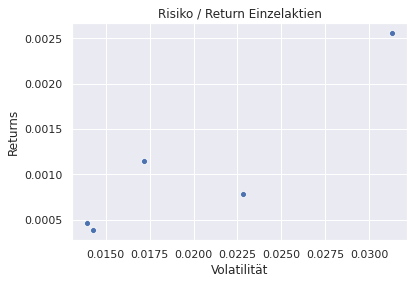

In [5]:
returns = data.pct_change()
cov_returns = returns.cov()
mean_returns = returns.mean()
std_returns = returns.std()

#plotten der Einzelaktien

plt.title('Risiko / Return Einzelaktien')
plt.xlabel('Volatilität')
plt.ylabel('Returns')
cmap = sns.cubehelix_palette(dark=.7, light=.8, as_cmap=True)
ax = sns.scatterplot(x=std_returns, y=mean_returns, palette=cmap)

# Generieren zufälliger Portfolios

Wir haben 5 Aktien und müssen entscheiden wie wir Anlegen, dazu ist unser Budget 1. 

In [6]:
from numpy import random
num_portfolios = 5000

def portfolio_performance(weights, mean_returns, cov_returns):
    pf_return = np.dot(weights, mean_returns) * 252
    pf_std = np.sqrt(np.dot( weights, np.dot(cov_returns, np.transpose(weights)))) *np.sqrt(252)
    pf_sharpe = pf_return[0] / pf_std[0][0]
    return weights[0][0], weights[0][1], weights[0][2], weights[0][3], weights[0][4], pf_return[0], pf_std[0][0], pf_sharpe

In [7]:
df_portfolios= pd.DataFrame(columns = ['% DTE.DE', '% FME.DE', '% AAPL', '% WDP.DE', '% HFG.DE', 'returns', 'volatility'])
for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(5), size=1)
    stk1, stk2, stk3, stk4, stk5, ret, vol, sharpe = portfolio_performance(weights, mean_returns, cov_returns)
    df_portfolios = df_portfolios.append({ '% DTE.DE': stk1,
                                            '% FME.DE': stk2,
                                            '% AAPL': stk3,
                                            '% WDP.DE': stk4,
                                            '% HFG.DE': stk5,
                                            'returns': ret,
                                            'volatility': vol,
                                            'sharpe ratio': sharpe}
                         ,ignore_index = True
                        )
df_portfolios.head()

,% DTE.DE,% FME.DE,% AAPL,% WDP.DE,% HFG.DE,returns,volatility,sharpe ratio
0,0.126529,0.242655,0.002537,0.279464,0.348815,0.314015,0.224768,1.397063
1,0.029598,0.048984,0.501957,0.089095,0.330366,0.184956,0.196095,0.943194
2,0.396956,0.156781,0.055487,0.105097,0.285678,0.262173,0.191764,1.367168
3,0.103727,0.319610,0.003952,0.294933,0.277779,0.312640,0.220294,1.419194
4,0.131338,0.277810,0.125066,0.197106,0.268681,0.262448,0.192293,1.364832


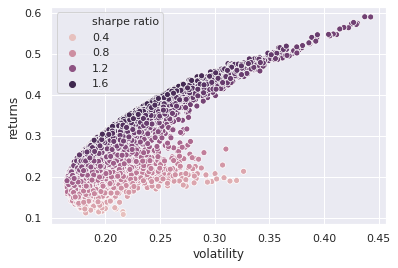

In [8]:
cmap = sns.cubehelix_palette(dark=.2, light=.8, as_cmap=True)
ax = sns.scatterplot(data=df_portfolios, x="volatility", y="returns", hue="sharpe ratio", palette=cmap)


In [9]:
# Berechnen max sharpe

max_sharpe = df_portfolios['sharpe ratio'].max()
ind_max_sharpe = df_portfolios[df_portfolios['sharpe ratio'] == max_sharpe]
print('Portfolio mit der maximalen Sharp Ratio:')
print(ind_max_sharpe)

# Portfolio mit dem geringsten Risiko
min_risk = df_portfolios['volatility'].min()
ind_min_risk = df_portfolios[df_portfolios['volatility'] == min_risk]

print('Portfolio mit dem geringsten Risiko:')
print(ind_min_risk)

# Portfolio mit den größten Returns
max_return = df_portfolios['returns'].max()
ind_max_return = df_portfolios[df_portfolios['returns'] == max_return]

print('Portfolio mit dem größten Return:')
print(ind_max_return)


Portfolio mit der maximalen Sharp Ratio:
     % DTE.DE  % FME.DE    % AAPL  % WDP.DE  % HFG.DE   returns  volatility  \
169  0.416045  0.082655  0.034905  0.338551  0.127844  0.376752    0.236096   

     sharpe ratio  
169      1.595761  
Portfolio mit dem geringsten Risiko:
      % DTE.DE  % FME.DE    % AAPL  % WDP.DE  % HFG.DE   returns  volatility  \
1611  0.233784  0.297787  0.303014  0.050402  0.115013  0.186667    0.164364   

      sharpe ratio  
1611      1.135691  
Portfolio mit dem größten Return:
      % DTE.DE  % FME.DE    % AAPL  % WDP.DE  % HFG.DE   returns  volatility  \
2508  0.077421  0.016206  0.018866  0.868232  0.019274  0.590295    0.437181   

      sharpe ratio  
2508      1.350231  


      % DTE.DE  % FME.DE    % AAPL  % WDP.DE  % HFG.DE   returns  volatility  \
1611  0.233784  0.297787  0.303014  0.050402  0.115013  0.186667    0.164364   

      sharpe ratio  
1611      1.135691  


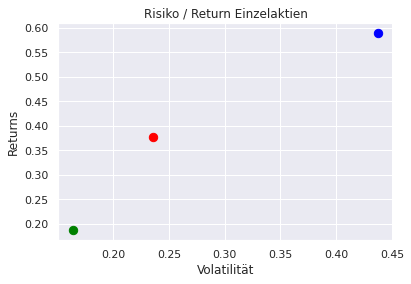

In [10]:
#finden der dominierenden Portfolios
# Portfolio dominiert, wenn es einen höheren Return für gleiches oder geringeres Risiko hat

# Portfolio mit dem geringsten Risiko
min_risk = df_portfolios['volatility'].min()
ind_min_risk = df_portfolios[df_portfolios['volatility'] == min_risk]
print(ind_min_risk)

plt.title('Risiko / Return Einzelaktien')
plt.xlabel('Volatilität')
plt.ylabel('Returns')
plt.scatter(ind_max_sharpe['volatility'], ind_max_sharpe['returns'], c='red', s=70)
plt.scatter(ind_min_risk['volatility'], ind_min_risk['returns'], c='green', s=70)
plt.scatter(ind_max_return['volatility'], ind_max_return['returns'], c='blue', s=70)



In [14]:

#Rausfinden was y für die Effizienz Grenze ist


eq1 = [ind_max_sharpe['volatility'] ** 2, ind_max_sharpe['volatility'], 0 ]
eq2 = [ind_min_risk['volatility'] **2, ind_min_risk['volatility'], 0]
eq3 = [ind_max_return['volatility'] **2, ind_max_return['volatility'], 0]

A = np.array([eq1, eq2, eq3], dtype='float')
B = np.array([ind_max_sharpe['returns'].iloc[0], ind_min_risk['returns'].iloc[0], ind_max_return['returns'].iloc[0]], dtype='float')
solution = np.linalg.lstsq(A,B)
print(solution[1])
print(solution[0][2])

[]
0.0


/home/johannes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


[0.00000000e+00 2.91436503e-06 5.82872964e-06 ... 2.70278879e+00
 2.70279129e+00 2.70279378e+00]


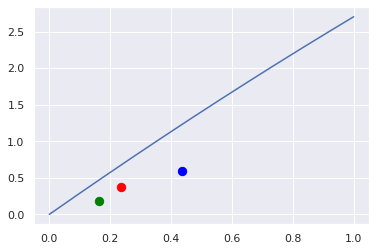

In [17]:
x = np.linspace(0, 1, 1000000)

y = solution[0][0]*x**2 + solution[0][1]*2*x + solution[0][2]  

print (y)
plt.scatter(ind_max_sharpe['volatility'], ind_max_sharpe['returns'], c='red', s=70)
plt.scatter(ind_min_risk['volatility'], ind_min_risk['returns'], c='green', s=70)
plt.scatter(ind_max_return['volatility'], ind_max_return['returns'], c='blue', s=70)
plt.plot(x, y)